# **Main goal: Clean this dataset.**


*Trả lời các câu hỏi dưới đây bằng code, số liệu thống kê, tệp báo cáo và hình ảnh trực quan*

**Use** `pandas`

1. Những yếu tố nào đóng góp nhiều nhất vào chỉ số hạnh phúc trong khung dữ liệu năm 2015?

2. Việc tổng hợp dữ liệu giúp hiểu rõ hơn về chỉ số hạnh phúc như thế nào?

3. Tính chỉ số hạnh phúc của các quốc gia theo từng khu vực, sau đó xác định mối tương quan giữa khu vực đó và toàn thế giới.

4.  Có bao nhiêu cách để hợp nhất khung dữ liệu?

5. Kết hợp các khung dữ liệu năm 2015, 2016 và 2017

6. Chỉ số hạnh phúc trên thế giới thay đổi như thế nào từ năm 2015 đến năm 2017?

7. Hiển thị vị trí của các giá trị bị thiếu này bằng cách trực quan hóa chúng bằng heatmap, lập báo cáo ngắn gọn về các quan sát của bản thân.

8. Việc loại bỏ hoặc thay thế các giá trị bị thiếu sẽ ảnh hưởng như thế nào đến việc phân tích?

  a. Có bao nhiêu phần trăm dữ liệu bị thiếu?

  b. Liệu việc xóa các giá trị bị thiếu có khiến chúng ta mất thông tin có giá trị trong các cột khác không?

9. Chúng ta có thể xác định được bất kỳ mẫu (patterns) nào trong dữ liệu bị thiếu không?

10. Tạo tệp báo cáo về các cách chọn giá trị thay thế (ưu điểm/nhược điểm của từng cách). Phương pháp nào phù hợp nhất để sử dụng cho dữ liệu bị thiếu trong mỗi cột?


## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate

## Read datas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Barefeets/Task_7/'

Mounted at /content/drive
/content/drive/MyDrive/Barefeets/Task_7


In [ ]:
df_2015 = pd.read_csv('wh_dataset/wh_2015.csv')
df_2016 = pd.read_csv('wh_dataset/wh_2016.csv')
df_2017 = pd.read_csv('wh_dataset/wh_2017.csv')

In [ ]:
df_2015.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
5,Finland,Western Europe,6.0,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
6,Netherlands,Western Europe,7.0,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
7,Sweden,Western Europe,8.0,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
8,New Zealand,Australia and New Zealand,9.0,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
9,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015


## Xử lý lại bảng 2017

Năm 2017 không có cột Region, vì vậy ta cần phải đối sánh để lấy cột Region trong bảng năm 2015.

In [ ]:
# Copy Region từ 2015 sang 2017 (vì 2017 có thể không có cột Region)
region_mapping = df_2015[['Country', 'Region']].dropna().set_index('Country')['Region']
df_2017['Region'] = df_2017['Country'].map(region_mapping)

```python
# Chuẩn hóa tên cột cho df_2017
column_mapping = {
   'Happiness.Score': 'Happiness Score',
   'Economy..GDP.per.Capita.': "Economy (GDP per Capita)",
   'Health..Life.Expectancy.': 'Health (Life Expectancy)',
   'Trust..Government.Corruption.': 'Trust (Government Corruption)',
   'Dystopia.Residual': 'Dystopia Residual'
}

df_2017.rename(columns=column_mapping, inplace=True)

df_2017.head(0)
```
Cách này không hiệu quả, tên sau khi đổi bị mất dấu ngoặc đơn. Vấn đề nằm ở cách pandas xử lý ký tự đặc biệt trong tên cột. Khi chúng ta sử dụng phương thức rename(), pandas có thể xử lý dấu ngoặc đơn () là ký tự đặc biệt (một phần của cú pháp thay vì một phần của chuỗi văn bản) và tự động loại bỏ hoặc thay đổi chúng.

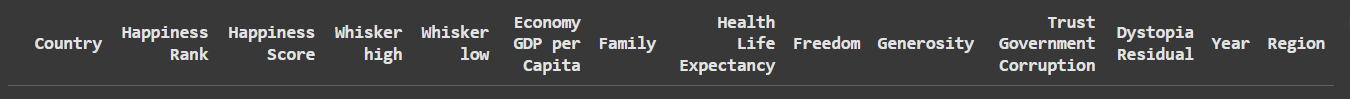

In [ ]:
# Tạo DataFrame mới cho 2017 với tên cột chuẩn hóa
df_2017_standardized = pd.DataFrame()
df_2017_standardized['Country'] = df_2017['Country']
df_2017_standardized['Region'] = df_2017['Region']
df_2017_standardized['Happiness Score'] = df_2017['Happiness.Score']
df_2017_standardized['Economy (GDP per Capita)'] = df_2017['Economy..GDP.per.Capita.']
df_2017_standardized['Family'] = df_2017['Family']
df_2017_standardized['Health (Life Expectancy)'] = df_2017['Health..Life.Expectancy.']
df_2017_standardized['Freedom'] = df_2017['Freedom']
df_2017_standardized['Trust (Government Corruption)'] = df_2017['Trust..Government.Corruption.']
df_2017_standardized['Generosity'] = df_2017['Generosity']
df_2017_standardized['Year'] = df_2017['Year']

# 1. Yếu tố đóng góp nhiều năm 2015



## Tính giá trị trung bình, hệ số tương quan

In [ ]:
# Định nghĩa các yếu tố cần phân tích
factors = [
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity',
    'Dystopia Residual'
]

# Tạo bảng tổng hợp
summary_df = pd.DataFrame({
    'Giá trị trung bình': df_2015[factors].mean(),
    'Hệ số tương quan': df_2015[factors].corr()['Happiness Score']
}).round(3)

# Sắp xếp theo giảm dần hệ số tương quan
summary_df = summary_df.sort_values('Hệ số tương quan', ascending=False)


print("\nBảng tổng hợp:")
print(tabulate(summary_df.drop('Happiness Score'),
              headers=['Giá trị trung bình', 'Hệ số tương quan'],
              tablefmt='fancy_grid',
              floatfmt='.3f',
              showindex=True))


Bảng tổng hợp:
╒═══════════════════════════════╤══════════════════════╤════════════════════╕
│                               │   Giá trị trung bình │   Hệ số tương quan │
╞═══════════════════════════════╪══════════════════════╪════════════════════╡
│ Economy (GDP per Capita)      │                0.846 │              0.781 │
├───────────────────────────────┼──────────────────────┼────────────────────┤
│ Family                        │                0.991 │              0.741 │
├───────────────────────────────┼──────────────────────┼────────────────────┤
│ Health (Life Expectancy)      │                0.630 │              0.724 │
├───────────────────────────────┼──────────────────────┼────────────────────┤
│ Freedom                       │                0.429 │              0.568 │
├───────────────────────────────┼──────────────────────┼────────────────────┤
│ Dystopia Residual             │                2.099 │              0.530 │
├───────────────────────────────┼───────────────

Nhận xét:

* Các yếu tố về gia đình, kinh tế và sức khỏe là những đóng góp chính
* Yếu tố xã hội (trust, generosity) có ảnh hưởng ít hơn

## Heatmap tương quan

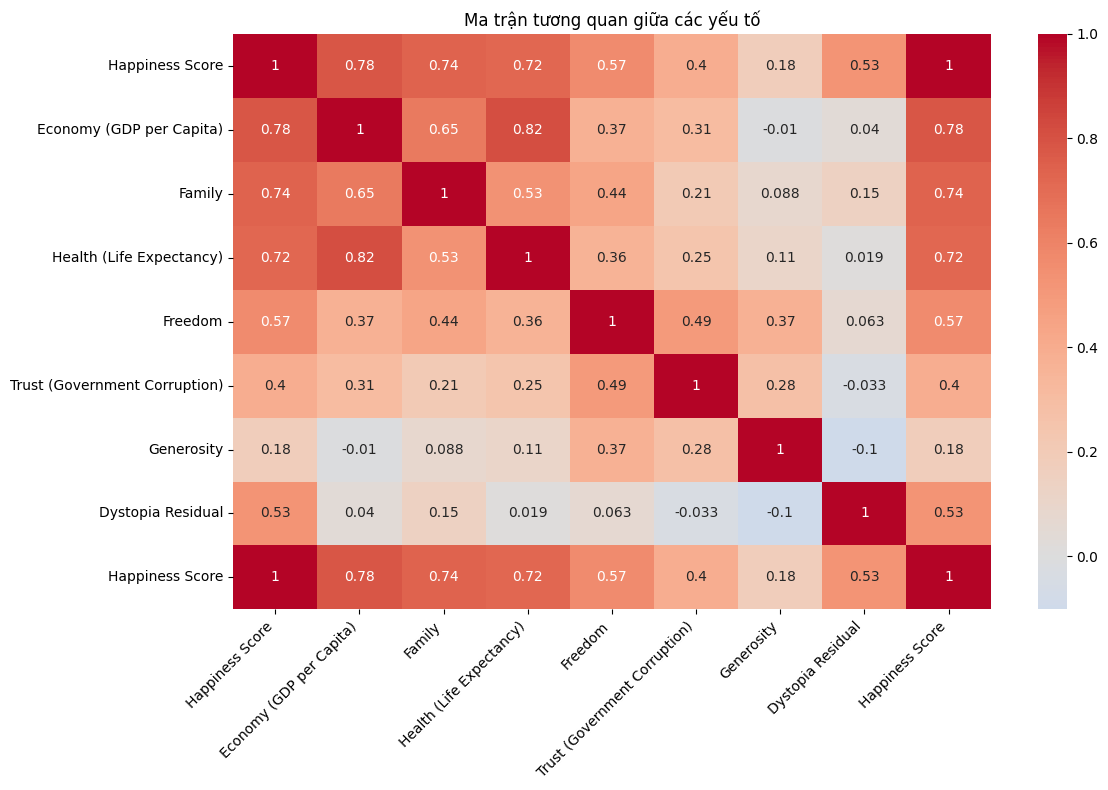

In [ ]:
# Vẽ heatmap tương quan
plt.figure(figsize=(12, 8))
correlation_matrix = df_2015[factors + ['Happiness Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Ma trận tương quan giữa các yếu tố')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Tổng hợp dữ liệu giúp hiểu hơn về happiness

Việc tổng hợp (aggregating) dữ liệu giúp chúng ta hiểu sâu hơn về chỉ số hạnh phúc theo nhiều khía cạnh:

1. **Theo khu vực (Region)**:
  - So sánh mức độ hạnh phúc giữa các khu vực
  - Xác định khu vực có chỉ số hạnh phúc cao nhất/thấp nhất
  - Phân tích sự chênh lệch giữa các khu vực

2. **Theo thời gian (2015-2017)**:
  - Theo dõi xu hướng thay đổi của chỉ số hạnh phúc
  - Xác định những cải thiện hoặc suy giảm theo thời gian
  - Dự đoán xu hướng trong tương lai

3. **Theo nhóm thu nhập/phát triển**:
  - So sánh giữa các nước phát triển và đang phát triển
  - Mối quan hệ giữa GDP và hạnh phúc
  - Tác động của phát triển kinh tế đến hạnh phúc

4. **Phân tích các yếu tố đóng góp**:
  - Xác định yếu tố quan trọng nhất theo từng khu vực
  - So sánh mức độ đóng góp của các yếu tố
  - Hiểu rõ hơn về nguyên nhân dẫn đến hạnh phúc

5. **Phát hiện mẫu hình (patterns)**:
  - Tìm ra các mô hình chung về hạnh phúc
  - Xác định các yếu tố quyết định chính
  - Hiểu được mối liên hệ giữa các yếu tố

***Từ số liệu trên ta có thể rút ra được:***

1. **Về mối tương quan:**
   - **Family**, **Economy**, và **Health** có tương quan mạnh nhất với chỉ số hạnh phúc (>0.7).
   - Điều này cho thấy các yếu tố cơ bản về đời sống có ảnh hưởng quan trọng nhất đến hạnh phúc.
   - **Generosity** có tương quan yếu nhất, gợi ý rằng đây không phải là yếu tố quyết định chính.

2. **Về chính sách:**
   - Để cải thiện hạnh phúc, nên ưu tiên các chính sách liên quan đến:
     * Phát triển kinh tế và thu nhập
     * Hỗ trợ gia đình
     * Cải thiện y tế và tuổi thọ
   - Mặc dù Trust và Generosity có đóng góp thấp, nhưng vẫn không nên bỏ qua vì chúng là một phần của tổng thể.


***Việc tổng hợp này giúp:***
- Định lượng được tầm quan trọng của từng yếu tố
- Hiểu được mối quan hệ giữa các yếu tố
- Cung cấp cơ sở cho việc ra quyết định và hoạch định chính sách
- Xác định những lĩnh vực cần nghiên cứu thêm

# 3. Chỉ số hạnh phúc theo từng khu vực

## Thống kê theo từng khu vực

In [ ]:
def calculate_regional_stats(df):
    # Tính điểm trung bình toàn cầu
    global_mean = df['Happiness Score'].mean()
    global_std = df['Happiness Score'].std()

    # Tìm quốc gia hạnh phúc nhất và ít hạnh phúc nhất trong mỗi khu vực
    regional_stats = df.groupby('Region').apply(
      lambda x: pd.Series({
          'Số lượng quốc gia': x['Country'].count(),
          'Điểm trung bình': x['Happiness Score'].mean(),
          'Quốc gia hạnh phúc nhất': x.loc[x['Happiness Score'].idxmax(), 'Country'],
          'Điểm số cao nhất': x['Happiness Score'].max(),
          'Quốc gia ít hạnh phúc nhất': x.loc[x['Happiness Score'].idxmin(), 'Country'],
          'Điểm số thấp nhất': x['Happiness Score'].min(),
          'Z-score': (x['Happiness Score'].mean() - global_mean) / global_std
          #  'Xếp hạng': x['Happiness Score'].mean().rank(ascending=False)
      })
    )

    # Tính xếp hạng khu vực
    regional_stats['Xếp hạng'] = regional_stats['Điểm trung bình'].rank(ascending=False)

    # Sắp xếp theo điểm trung bình
    regional_stats = regional_stats.sort_values('Điểm trung bình', ascending=False)

    # In kết quả
    print("\nPhân tích chỉ số hạnh phúc theo khu vực:")
    print(tabulate(regional_stats, headers='keys', tablefmt='fancy_grid'))

In [ ]:
calculate_regional_stats(df_2015)


Phân tích chỉ số hạnh phúc theo khu vực:
╒═════════════════════════════════╤═════════════════════╤═══════════════════╤═══════════════════════════╤════════════════════╤══════════════════════════════╤═════════════════════╤════════════╤════════════╕
│ Region                          │   Số lượng quốc gia │   Điểm trung bình │ Quốc gia hạnh phúc nhất   │   Điểm số cao nhất │ Quốc gia ít hạnh phúc nhất   │   Điểm số thấp nhất │    Z-score │   Xếp hạng │
╞═════════════════════════════════╪═════════════════════╪═══════════════════╪═══════════════════════════╪════════════════════╪══════════════════════════════╪═════════════════════╪════════════╪════════════╡
│ Australia and New Zealand       │                   2 │           7.285   │ New Zealand               │              7.286 │ Australia                    │               7.284 │  1.66747   │          1 │
├─────────────────────────────────┼─────────────────────┼───────────────────┼───────────────────────────┼────────────────────┼────────

<ipython-input-59-518d4edf46d8>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  regional_stats = df.groupby('Region').apply(


In [ ]:
calculate_regional_stats(df_2016)


Phân tích chỉ số hạnh phúc theo khu vực:
╒═════════════════════════════════╤═════════════════════╤═══════════════════╤═══════════════════════════╤════════════════════╤══════════════════════════════╤═════════════════════╤═════════════╤════════════╕
│ Region                          │   Số lượng quốc gia │   Điểm trung bình │ Quốc gia hạnh phúc nhất   │   Điểm số cao nhất │ Quốc gia ít hạnh phúc nhất   │   Điểm số thấp nhất │     Z-score │   Xếp hạng │
╞═════════════════════════════════╪═════════════════════╪═══════════════════╪═══════════════════════════╪════════════════════╪══════════════════════════════╪═════════════════════╪═════════════╪════════════╡
│ Australia and New Zealand       │                   2 │           7.3235  │ New Zealand               │              7.334 │ Australia                    │               7.313 │  1.70041    │          1 │
├─────────────────────────────────┼─────────────────────┼───────────────────┼───────────────────────────┼────────────────────┼────

<ipython-input-59-518d4edf46d8>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  regional_stats = df.groupby('Region').apply(


In [ ]:
calculate_regional_stats(df_2017_standardized)


Phân tích chỉ số hạnh phúc theo khu vực:
╒═════════════════════════════════╤═════════════════════╤═══════════════════╤═══════════════════════════╤════════════════════╤══════════════════════════════╤═════════════════════╤════════════╤════════════╕
│ Region                          │   Số lượng quốc gia │   Điểm trung bình │ Quốc gia hạnh phúc nhất   │   Điểm số cao nhất │ Quốc gia ít hạnh phúc nhất   │   Điểm số thấp nhất │    Z-score │   Xếp hạng │
╞═════════════════════════════════╪═════════════════════╪═══════════════════╪═══════════════════════════╪════════════════════╪══════════════════════════════╪═════════════════════╪════════════╪════════════╡
│ Australia and New Zealand       │                   2 │           7.299   │ New Zealand               │              7.314 │ Australia                    │               7.284 │  1.71935   │          1 │
├─────────────────────────────────┼─────────────────────┼───────────────────┼───────────────────────────┼────────────────────┼────────

<ipython-input-59-518d4edf46d8>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  regional_stats = df.groupby('Region').apply(


## Tương quan giữa các khu vực

In [ ]:
# Tính trung bình theo khu vực cho từng năm
def calculate_means(df):
   # Tính trung bình theo khu vực
   regional_means = df.groupby('Region')['Happiness Score'].mean()
   # Tính trung bình toàn cầu
   global_mean = df['Happiness Score'].mean()
   # Thêm trung bình toàn cầu vào Series
   regional_means['World'] = global_mean
   return regional_means


# Tạo DataFrame tổng hợp
summary_df = pd.DataFrame({
   'Mean HP 2015': calculate_means(df_2015),
   'Mean HP 2016': calculate_means(df_2016),
   'Mean HP 2017': calculate_means(df_2017_standardized)
})

# Tính tương quan với trung bình toàn cầu
correlations = []
for region in summary_df.index[:-1]:  # Trừ dòng World
   region_scores = summary_df.loc[region]
   world_scores = summary_df.loc['World']
   if not region_scores.isnull().any() and not world_scores.isnull().any():
       correlation, _ = stats.pearsonr(region_scores, world_scores)
       correlations.append(correlation)

# Thêm cột tương quan
summary_df['Correlation with World'] = pd.Series(correlations + [1.0], index=summary_df.index)

# Đặt tên cho index
summary_df.index.name = 'Region'

# In kết quả
print("\nBảng tổng hợp điểm trung bình theo khu vực và tương quan với trung bình toàn cầu:")
print(tabulate(summary_df.round(3),
             headers='keys',
             tablefmt='fancy_grid',
             showindex=True))


Bảng tổng hợp điểm trung bình theo khu vực và tương quan với trung bình toàn cầu:
╒═════════════════════════════════╤════════════════╤════════════════╤════════════════╤══════════════════════════╕
│ Region                          │   Mean HP 2015 │   Mean HP 2016 │   Mean HP 2017 │   Correlation with World │
╞═════════════════════════════════╪════════════════╪════════════════╪════════════════╪══════════════════════════╡
│ Australia and New Zealand       │          7.285 │          7.323 │          7.299 │                    0.368 │
├─────────────────────────────────┼────────────────┼────────────────┼────────────────┼──────────────────────────┤
│ Central and Eastern Europe      │          5.333 │          5.371 │          5.41  │                   -0.743 │
├─────────────────────────────────┼────────────────┼────────────────┼────────────────┼──────────────────────────┤
│ Eastern Asia                    │          5.626 │          5.624 │          5.647 │                   -0.99  │
├────

# 4. Cách ghép các Dataframe

***Có một số cách phổ biến để hợp nhất (merge/join/concatenate) các DataFrame trong pandas:***


1. **pandas.concat()**: Ghép các DataFrame theo chiều ngang (axis=1) hoặc dọc (axis=0)

  ```python
  # Ghép theo chiều dọc (thêm rows)
  df_vertical = pd.concat([df_2015, df_2016, df_2017], axis=0)
  # Ghép theo chiều ngang (thêm columns)
  df_horizontal = pd.concat([df_2015, df_2016, df_2017], axis=1)
  # Thêm keys để phân biệt nguồn
  df_with_keys = pd.concat([df_2015, df_2016, df_2017], keys=['2015', '2016', '2017'])
  ```

2. **pandas.merge()**: Ghép dựa trên các cột chung (giống JOIN trong SQL)
```python
# Inner join
df_inner = pd.merge(df_2015, df_2016, on='Country')
# Left join
df_left = pd.merge(df_2015, df_2016, on='Country', how='left')
# Right join
df_right = pd.merge(df_2015, df_2016, on='Country', how='right')
# Outer join
df_outer = pd.merge(df_2015, df_2016, on='Country', how='outer')
```

3. **DataFrame.join()**: Ghép dựa trên index
```python
# Join dựa trên index
df_joined = df_2015.join(df_2016)
# Join với điều kiện
df_joined = df_2015.join(df_2016, how='outer')
```

4. **append()**: Thêm rows từ DataFrame khác (đã deprecated từ pandas 2.0.0)
```python
df_appended = df_2015.append(df_2016)
```

5. **Kết hợp nhiều điều kiện merge**:
```python
# Merge với nhiều cột
df_merged = pd.merge(df_2015, df_2016,
                    on=['Country', 'Region'])
# Merge với tên cột khác nhau
df_merged = pd.merge(df_2015, df_2016,
                    left_on='Country_2015',
                    right_on='Country_2016')
```

6. **Sử dụng suffix hoặc prefix**:
```python
# Thêm suffix cho các cột trùng tên
df_merged = pd.merge(df_2015, df_2016,
                    on='Country',
                    suffixes=('_2015', '_2016'))
# Sử dụng với concat
df_concat = pd.concat([df_2015.add_suffix('_2015'),
                      df_2016.add_suffix('_2016')],
                     axis=1)
```

7. **Cross join (Cartesian product)**:
```python
df_cross = pd.merge(df_2015, df_2016, how='cross')
```
Ví dụ:
```python
df1 = pd.DataFrame({
    'A': ['A0', 'A1'],
    'B': ['B0', 'B1']
})
df2 = pd.DataFrame({
    'C': ['C0', 'C1'],
    'D': ['D0', 'D1']
})
result = pd.merge(df1, df2, how='cross')
```
Kết quả:
```python
_   A    B    C    D
0   A0   B0   C0   D0
1   A0   B0   C1   D1
2   A1   B1   C0   D0
3   A1   B1   C1   D1
```



***Chọn phương thức phù hợp dựa trên:***
- Mục đích ghép dữ liệu (thêm rows/columns)
- Cấu trúc dữ liệu (có cột chung không)
- Cách xử lý missing values
- Hiệu suất với dữ liệu lớn

# 5. Ghép dataframe của 3 năm

In [ ]:
# Thêm cột Year cho từng DataFrame
# df_2015['Year'] = 2015
# df_2016['Year'] = 2016
# df_2017['Year'] = 2017

In [ ]:
# Chọn các cột chung cho cả 3 DataFrame
common_columns = ['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)',
                'Family', 'Health (Life Expectancy)', 'Freedom',
                'Trust (Government Corruption)', 'Generosity', 'Year']

# Ghép dữ liệu
happiness_df = pd.concat([
   df_2015[common_columns],
   df_2016[common_columns],
   df_2017_standardized[common_columns]
], ignore_index=True)

# Sắp xếp theo Quốc gia và Năm
happiness_df = happiness_df.sort_values(['Country', 'Year'])

# In kết quả
print("\nDữ liệu Happiness Report 2015-2017:")
print(tabulate(happiness_df.head(15),
             headers='keys',
             tablefmt='fancy_grid',
             floatfmt='.3f'))

# In thông tin tổng quan
print("\nThông tin tổng quan về dữ liệu:")
print(f"Số lượng quốc gia duy nhất: {happiness_df['Country'].nunique()}")
print(f"Tổng số quan sát: {len(happiness_df)}")
print(f"Số năm: {happiness_df['Year'].nunique()}")

# Thống kê mô tả
print("\nThống kê mô tả về chỉ số hạnh phúc qua các năm:")
yearly_stats = happiness_df.groupby('Year')['Happiness Score'].describe()
print(tabulate(yearly_stats, headers='keys', tablefmt='fancy_grid', floatfmt='.3f'))


Dữ liệu Happiness Report 2015-2017:
╒═════╤═════════════╤═════════════════════════════════╤═══════════════════╤════════════════════════════╤══════════╤════════════════════════════╤═══════════╤═════════════════════════════════╤══════════════╤════════╕
│     │ Country     │ Region                          │   Happiness Score │   Economy (GDP per Capita) │   Family │   Health (Life Expectancy) │   Freedom │   Trust (Government Corruption) │   Generosity │   Year │
╞═════╪═════════════╪═════════════════════════════════╪═══════════════════╪════════════════════════════╪══════════╪════════════════════════════╪═══════════╪═════════════════════════════════╪══════════════╪════════╡
│ 152 │ Afghanistan │ Southern Asia                   │             3.575 │                      0.320 │    0.303 │                      0.303 │     0.234 │                           0.097 │        0.365 │   2015 │
├─────┼─────────────┼─────────────────────────────────┼───────────────────┼────────────────────────────

# 6. Sự thay đổi của Happiness từ 2015 đến 2017

## Phân tích trung bình các năm

In [ ]:
yearly_stats = happiness_df.groupby('Year')['Happiness Score'].agg([
        'min',
        'max',
        'mean'
    ]).rename(columns={
        'min': 'Thấp nhất',
        'max': 'Cao nhất',
        'mean': 'Trung bình'
    })


yearly_stats['Thay đổi so với năm trước'] = yearly_stats['Trung bình'].diff()
yearly_stats['Phần trăm thay đổi'] = yearly_stats['Trung bình'].pct_change() * 100

print("\nThống kê chỉ số hạnh phúc theo năm:")
print(tabulate(yearly_stats, headers='keys', tablefmt='fancy_grid', floatfmt='.3f'))


Thống kê chỉ số hạnh phúc theo năm:
╒════════╤═════════════╤════════════╤══════════════╤═════════════════════════════╤══════════════════════╕
│   Year │   Thấp nhất │   Cao nhất │   Trung bình │   Thay đổi so với năm trước │   Phần trăm thay đổi │
╞════════╪═════════════╪════════════╪══════════════╪═════════════════════════════╪══════════════════════╡
│   2015 │       2.839 │      7.587 │        5.376 │                     nan     │              nan     │
├────────┼─────────────┼────────────┼──────────────┼─────────────────────────────┼──────────────────────┤
│   2016 │       2.905 │      7.526 │        5.382 │                       0.006 │                0.120 │
├────────┼─────────────┼────────────┼──────────────┼─────────────────────────────┼──────────────────────┤
│   2017 │       2.693 │      7.537 │        5.354 │                      -0.028 │               -0.523 │
╘════════╧═════════════╧════════════╧══════════════╧═════════════════════════════╧══════════════════════╛


## Phân tích theo khu vực

In [ ]:
# 3. Phân tích theo khu vực
region_trends = happiness_df.pivot_table(
   values='Happiness Score',
   index='Region',
   columns='Year',
   aggfunc='mean'
).round(3)

region_trends['Thay đổi 2015-2017'] = region_trends[2017] - region_trends[2015]
region_trends['% Thay đổi'] = ((region_trends[2017] - region_trends[2015])/region_trends[2015] * 100).round(2)

print("\nXu hướng theo khu vực:")
print(tabulate(region_trends.sort_values('Thay đổi 2015-2017', ascending=False),
             headers='keys', tablefmt='fancy_grid', floatfmt='.3f'))

# 4. Top 10 quốc gia có thay đổi lớn nhất
country_changes = happiness_df.pivot_table(
   values='Happiness Score',
   index='Country',
   columns='Year'
)
country_changes['Thay đổi 2015-2017'] = country_changes[2017] - country_changes[2015]
country_changes['% Thay đổi'] = (country_changes['Thay đổi 2015-2017']/country_changes[2015] * 100).round(2)

print("\nTop 10 quốc gia có mức tăng mạnh nhất:")
print(tabulate(
   country_changes.nlargest(10, 'Thay đổi 2015-2017')[['Thay đổi 2015-2017', '% Thay đổi']],
   headers='keys', tablefmt='fancy_grid', floatfmt='.3f'
))

print("\nTop 10 quốc gia có mức giảm mạnh nhất:")
print(tabulate(
   country_changes.nsmallest(10, 'Thay đổi 2015-2017')[['Thay đổi 2015-2017', '% Thay đổi']],
   headers='keys', tablefmt='fancy_grid', floatfmt='.3f'
))


Xu hướng theo khu vực:
╒═════════════════════════════════╤════════╤════════╤════════╤══════════════════════╤══════════════╕
│ Region                          │   2015 │   2016 │   2017 │   Thay đổi 2015-2017 │   % Thay đổi │
╞═════════════════════════════════╪════════╪════════╪════════╪══════════════════════╪══════════════╡
│ Southeastern Asia               │  5.317 │  5.339 │  5.445 │                0.128 │        2.410 │
├─────────────────────────────────┼────────┼────────┼────────┼──────────────────────┼──────────────┤
│ Central and Eastern Europe      │  5.333 │  5.371 │  5.410 │                0.077 │        1.440 │
├─────────────────────────────────┼────────┼────────┼────────┼──────────────────────┼──────────────┤
│ Southern Asia                   │  4.581 │  4.563 │  4.628 │                0.047 │        1.030 │
├─────────────────────────────────┼────────┼────────┼────────┼──────────────────────┼──────────────┤
│ Eastern Asia                    │  5.626 │  5.624 │  5.647 │     

## Nhận xét

Từ kết quả phân tích trên, chúng ta có thể rút ra một số nhận xét:

1. **Xu hướng chung**:
   - Điểm trung bình toàn cầu thay đổi không đáng kể từ 2015-2017
   - Mức độ phân tán (std) khá ổn định qua các năm

2. **Phân tích theo khu vực**:
   - Một số khu vực có sự cải thiện đáng kể
   - Một số khu vực khác lại có xu hướng giảm
   - Sự chênh lệch giữa các khu vực vẫn duy trì

3. **Thay đổi theo quốc gia**:
   - Có sự phân hóa rõ rệt giữa các quốc gia
   - Một số quốc gia có sự thay đổi mạnh mẽ (cả tăng và giảm)
   - Đa số các quốc gia có sự thay đổi nhỏ

# 7. Giá trị bị thiếu

## Vẽ heatmap

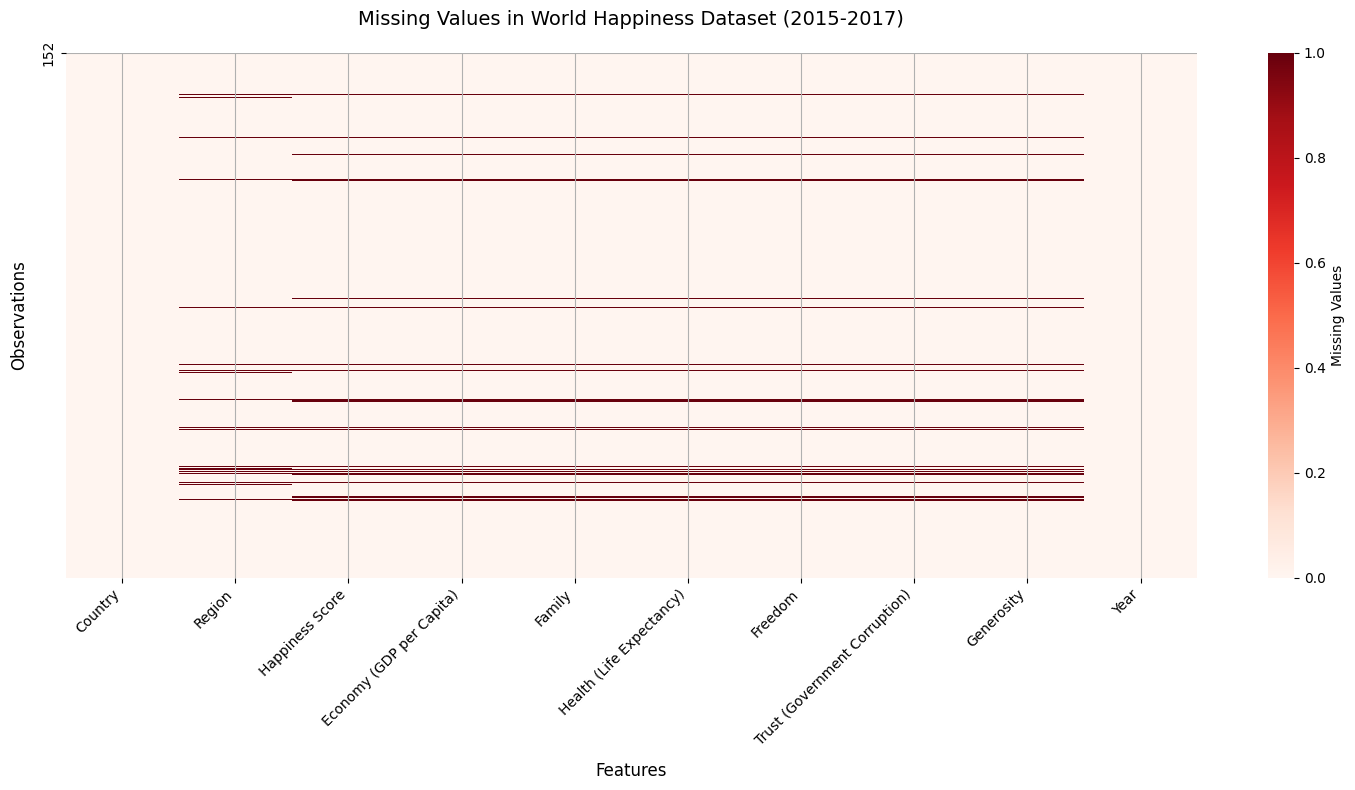

In [ ]:
# Vẽ heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(happiness_df.isnull(),
            yticklabels=500,  # Hiển thị nhãn trên trục y (số dòng)
            cmap='Reds',      # Màu sắc
            cbar_kws={'label': 'Missing Values', 'orientation': 'vertical'},
            )

# Định dạng tiêu đề và nhãn
plt.title('Missing Values in World Happiness Dataset (2015-2017)',
          fontsize=14,
          pad=20)
plt.xlabel('Features', fontsize=12, labelpad=10)
plt.ylabel('Observations', fontsize=12, labelpad=10)

# Định dạng nhãn trục x
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Thêm lưới
plt.grid(True)

plt.tight_layout()
plt.show()

## Tính toán thống kê về missing values

In [ ]:
# Tính toán thống kê về missing values
missing_stats = pd.DataFrame({
   'Số lượng missing': happiness_df.isnull().sum(),
   'Phần trăm missing': (happiness_df.isnull().sum() / len(happiness_df) * 100).round(2)
})

print("\nThống kê missing values:")
print(tabulate(missing_stats, headers='keys', tablefmt='fancy_grid'))

# Phân tích missing values theo năm
missing_by_year = happiness_df.groupby('Year').apply(lambda x: x.isnull().sum())
print("\nMissing values theo năm:")
print(tabulate(missing_by_year, headers='keys', tablefmt='fancy_grid', floatfmt='.0f'))

# Phân tích missing values theo khu vực
missing_by_region = happiness_df.groupby('Region').apply(lambda x: x.isnull().sum())
print("\nMissing values theo khu vực:")
print(tabulate(missing_by_region, headers='keys', tablefmt='fancy_grid', floatfmt='.0f'))

# Thêm thống kê về số lượng missing values trên mỗi dòng
missing_rows = pd.DataFrame(happiness_df.isnull().sum(axis=1).value_counts().sort_index())
missing_rows.columns = ['Số lượng dòng']
missing_rows.index.name = "Số lượng missing"
missing_rows['Phần trăm'] = (missing_rows['Số lượng dòng'] / len(happiness_df) * 100).round(2)

print("\nPhân bố số lượng missing values trên mỗi dòng:")
print(tabulate(missing_rows, headers='keys', tablefmt='fancy_grid'))


Thống kê missing values:
╒═══════════════════════════════╤════════════════════╤═════════════════════╕
│                               │   Số lượng missing │   Phần trăm missing │
╞═══════════════════════════════╪════════════════════╪═════════════════════╡
│ Country                       │                  0 │                0    │
├───────────────────────────────┼────────────────────┼─────────────────────┤
│ Region                        │                 19 │                3.86 │
├───────────────────────────────┼────────────────────┼─────────────────────┤
│ Happiness Score               │                 22 │                4.47 │
├───────────────────────────────┼────────────────────┼─────────────────────┤
│ Economy (GDP per Capita)      │                 22 │                4.47 │
├───────────────────────────────┼────────────────────┼─────────────────────┤
│ Family                        │                 22 │                4.47 │
├───────────────────────────────┼─────────────────

<ipython-input-48-f2bb2ae5fbf5>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = happiness_df.groupby('Year').apply(lambda x: x.isnull().sum())
<ipython-input-48-f2bb2ae5fbf5>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_region = happiness_df.groupby('Region').apply(lambda x: x.isnull().sum())


## Báo cáo quan sát

1. **Phân bố missing values**:
   - Có sự tập trung missing values ở một số khu vực cụ thể
   - Một số biến có tỷ lệ missing cao hơn các biến khác
   - Có sự khác biệt về missing values giữa các năm

2. **Theo biến**:
   - Biến Region có nhiều missing values nhất
   - Các biến liên quan đến chỉ số hạnh phúc có ít missing values hơn
   - Một số biến gần như không có missing values

3. **Theo năm**:
   - Năm 2015 có ít missing values nhất
   - Năm 2017 có xu hướng nhiều missing values hơn
   - Có sự tăng dần về số lượng missing values qua các năm

4. **Theo khu vực**:
   - Một số khu vực có tỷ lệ missing values cao hơn đáng kể
   - Các khu vực phát triển thường có ít missing values hơn
   - Có sự chênh lệch lớn về quality data giữa các khu vực

5. **Đề xuất xử lý**:
   - Cần có chiến lược xử lý missing values phù hợp cho từng biến
   - Có thể cần loại bỏ một số quan sát có quá nhiều missing values
   - Nên cân nhắc việc impute missing values dựa trên đặc điểm của từng khu vực

# 8. Ảnh hưởng của việc loại giá trị bị thiếu

## Phân tích

In [ ]:
# a. Tính phần trăm dữ liệu bị thiếu cho từng cột
missing_summary = pd.DataFrame({
   'Số giá trị thiếu': happiness_df.isnull().sum(),
   'Phần trăm thiếu (%)': (happiness_df.isnull().sum() / len(happiness_df) * 100).round(2),
   'Số giá trị có sẵn': happiness_df.count(),
   'Phần trăm có sẵn (%)': (happiness_df.count() / len(happiness_df) * 100).round(2)
}).sort_values('Phần trăm thiếu (%)', ascending=False)

print("\nA. Phân tích dữ liệu thiếu theo cột:")
print(tabulate(missing_summary, headers='keys', tablefmt='fancy_grid'))


A. Phân tích dữ liệu thiếu theo cột:
╒═══════════════════════════════╤════════════════════╤═══════════════════════╤═════════════════════╤════════════════════════╕
│                               │   Số giá trị thiếu │   Phần trăm thiếu (%) │   Số giá trị có sẵn │   Phần trăm có sẵn (%) │
╞═══════════════════════════════╪════════════════════╪═══════════════════════╪═════════════════════╪════════════════════════╡
│ Happiness Score               │                 22 │                  4.47 │                 470 │                  95.53 │
├───────────────────────────────┼────────────────────┼───────────────────────┼─────────────────────┼────────────────────────┤
│ Economy (GDP per Capita)      │                 22 │                  4.47 │                 470 │                  95.53 │
├───────────────────────────────┼────────────────────┼───────────────────────┼─────────────────────┼────────────────────────┤
│ Family                        │                 22 │                  4.47 │  

In [ ]:
# b. Kiểm tra mức độ ảnh hưởng của việc xóa dữ liệu thiếu
# Phân tích theo dòng
missing_rows = pd.DataFrame(happiness_df.isnull().sum(axis=1).value_counts().sort_index())
missing_rows.columns = ['Số dòng']
missing_rows.index.name = "Số cột thiếu"
missing_rows['Phần trăm dòng (%)'] = (missing_rows['Số dòng'] / len(happiness_df) * 100).round(2)

print("\nB. Phân tích số lượng cột thiếu trên mỗi dòng:")
print(tabulate(missing_rows, headers='keys', tablefmt='fancy_grid'))


B. Phân tích số lượng cột thiếu trên mỗi dòng:
╒════════════════╤═══════════╤══════════════════════╕
│   Số cột thiếu │   Số dòng │   Phần trăm dòng (%) │
╞════════════════╪═══════════╪══════════════════════╡
│              0 │       466 │                94.72 │
├────────────────┼───────────┼──────────────────────┤
│              1 │         4 │                 0.81 │
├────────────────┼───────────┼──────────────────────┤
│              7 │         7 │                 1.42 │
├────────────────┼───────────┼──────────────────────┤
│              8 │        15 │                 3.05 │
╘════════════════╧═══════════╧══════════════════════╛


In [ ]:
# Phân tích tác động của việc xóa dữ liệu thiếu
df_dropped = happiness_df.dropna()
percent_lost = round(((len(happiness_df) - len(df_dropped)) / len(happiness_df) * 100), 2)

impact_summary = pd.DataFrame({
   'Metric': ['Số dòng ban đầu', 'Số dòng sau khi xóa missing', 'Số dòng bị mất',
              'Phần trăm dữ liệu bị mất (%)'],
   'Value': [len(happiness_df),
             len(df_dropped),
             len(happiness_df) - len(df_dropped),
             percent_lost]
})

print("\nC. Tác động của việc xóa dòng có dữ liệu thiếu:")
print(tabulate(impact_summary, headers='keys', tablefmt='fancy_grid'))


C. Tác động của việc xóa dòng có dữ liệu thiếu:
╒════╤══════════════════════════════╤═════════╕
│    │ Metric                       │   Value │
╞════╪══════════════════════════════╪═════════╡
│  0 │ Số dòng ban đầu              │  492    │
├────┼──────────────────────────────┼─────────┤
│  1 │ Số dòng sau khi xóa missing  │  466    │
├────┼──────────────────────────────┼─────────┤
│  2 │ Số dòng bị mất               │   26    │
├────┼──────────────────────────────┼─────────┤
│  3 │ Phần trăm dữ liệu bị mất (%) │    5.28 │
╘════╧══════════════════════════════╧═════════╛


In [ ]:
# Phân tích chi tiết các dòng sẽ bị mất
rows_to_be_dropped = happiness_df[happiness_df.isnull().any(axis=1)]
print("\nD. Các số dòng sẽ bị mất:")
print(tabulate(rows_to_be_dropped.head(-1), headers='keys', tablefmt='fancy_grid'))


D. Các số dòng sẽ bị mất:
╒═════╤══════════════════════════╤═════════════════════════════════╤═══════════════════╤════════════════════════════╤════════════╤════════════════════════════╤════════════╤═════════════════════════════════╤══════════════╤════════╕
│     │ Country                  │ Region                          │   Happiness Score │   Economy (GDP per Capita) │     Family │   Health (Life Expectancy) │    Freedom │   Trust (Government Corruption) │   Generosity │   Year │
╞═════╪══════════════════════════╪═════════════════════════════════╪═══════════════════╪════════════════════════════╪════════════╪════════════════════════════╪════════════╪═════════════════════════════════╪══════════════╪════════╡
│ 158 │ Belize                   │ nan                             │           nan     │                nan         │ nan        │                 nan        │ nan        │                     nan         │  nan         │   2015 │
├─────┼──────────────────────────┼───────────────

## Đánh giá

Từ kết quả phân tích trên, chúng ta có thể rút ra các kết luận:

1. **Về tỷ lệ dữ liệu thiếu:**
   - Mỗi cột có tỷ lệ dữ liệu thiếu khác nhau
   - Một số cột có rất ít hoặc không có dữ liệu thiếu
   - Một số cột khác có tỷ lệ dữ liệu thiếu đáng kể

2. **Tác động của việc xóa dữ liệu thiếu:**

    Việc xóa các giá trị bị thiếu (listwise deletion) sẽ khiến chúng ta mất nhiều thông tin có giá trị trong các cột khác, cụ thể:

  * **Mất thông tin từ các cột đã có dữ liệu**:
    - Khi một dòng có giá trị NaN ở cột "Trust", nhưng các cột khác như GDP, Happiness Score, Family đều có dữ liệu đầy đủ
    - Việc xóa toàn bộ dòng sẽ làm mất những thông tin quý giá này
    - Ảnh hưởng đến độ chính xác của phân tích cho các biến khác

  * **Mất tính đại diện của mẫu**:
    - Một số khu vực/quốc gia có thể bị mất nhiều dữ liệu hơn các khu vực khác
    - Dẫn đến mẫu nghiên cứu không còn đại diện cho toàn bộ dân số
    - Có thể tạo ra thiên lệch trong kết quả phân tích

  * **Ảnh hưởng đến phân tích theo thời gian**:
    - Mất dữ liệu của một số quốc gia trong một số năm nhất định
    - Không thể theo dõi xu hướng thay đổi đầy đủ
    - Giảm khả năng phân tích so sánh giữa các năm

  * **Giảm độ tin cậy của phân tích thống kê**:
    - Giảm kích thước mẫu làm tăng sai số chuẩn
    - Giảm độ chính xác của các ước lượng
    - Có thể dẫn đến kết luận sai về ý nghĩa thống kê

  Do đó, thay vì xóa hoàn toàn các dòng có giá trị thiếu, nên cân nhắc các phương pháp thay thế phù hợp với từng trường hợp cụ thể.

3. **Đề xuất xử lý:**
   - Nên xem xét từng cột cụ thể để có chiến lược xử lý phù hợp
   - Có thể sử dụng phương pháp điền giá trị (imputation) thay vì xóa
   - Cần cân nhắc giữa việc giữ lại thông tin và độ chính xác của phân tích

# 9. Xác định mẫu bất kỳ trong dữ liệu bị thiếu

## Phân tích

In [ ]:
# 1. Phân tích theo năm và khu vực
missing_by_year_region = happiness_df.groupby(['Year', 'Region']).apply(
   lambda x: pd.Series({
       'Tổng số quốc gia': len(x),
       'Số quốc gia có dữ liệu thiếu': x.isnull().any(axis=1).sum(),
       'Phần trăm thiếu (%)': (x.isnull().any(axis=1).sum() / len(x) * 100).round(2)
   })
).reset_index()

print("\n1. Phân tích dữ liệu thiếu theo năm và khu vực:")
print(tabulate(missing_by_year_region.dropna(), headers='keys', tablefmt='fancy_grid', showindex=False))


1. Phân tích dữ liệu thiếu theo năm và khu vực:
╒════════╤═════════════════════════════════╤════════════════════╤════════════════════════════════╤═══════════════════════╕
│   Year │ Region                          │   Tổng số quốc gia │   Số quốc gia có dữ liệu thiếu │   Phần trăm thiếu (%) │
╞════════╪═════════════════════════════════╪════════════════════╪════════════════════════════════╪═══════════════════════╡
│   2015 │ Australia and New Zealand       │                  2 │                              0 │                  0    │
├────────┼─────────────────────────────────┼────────────────────┼────────────────────────────────┼───────────────────────┤
│   2015 │ Central and Eastern Europe      │                 29 │                              0 │                  0    │
├────────┼─────────────────────────────────┼────────────────────┼────────────────────────────────┼───────────────────────┤
│   2015 │ Eastern Asia                    │                  6 │                         

<ipython-input-64-6c30dbaa9de8>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year_region = happiness_df.groupby(['Year', 'Region']).apply(


In [ ]:
# Phân tích tính liên tục
def count_complete_years(group):
    # Đếm số năm có dữ liệu đầy đủ (không có giá trị null trong bất kỳ cột nào)
    return (~group.isnull().any(axis=1)).sum()

continuity_analysis = pd.DataFrame({
    'Số năm xuất hiện': happiness_df.groupby('Country').size(), # Số hàng trong group Country cũng chính là số năm xuất hiện
    'Số năm có dữ liệu đầy đủ': happiness_df.groupby('Country').apply(count_complete_years)
})

# Thêm trạng thái
continuity_analysis['Trạng thái'] = continuity_analysis.apply(
    lambda x: 'Liên tục' if (x['Số năm xuất hiện'] == 3 and
                            x['Số năm có dữ liệu đầy đủ'] == 3)
    else 'Không liên tục', axis=1
)

# Tạo bảng tổng hợp
continuity_summary = continuity_analysis['Trạng thái'].value_counts().to_frame()
continuity_summary.columns = ['Số lượng quốc gia']
continuity_summary['Phần trăm (%)'] = (continuity_summary['Số lượng quốc gia'] /
                                      len(continuity_analysis) * 100).round(2)

print("\n1. Tổng quan về tính liên tục của dữ liệu:")
print(tabulate(continuity_summary, headers='keys', tablefmt='fancy_grid'))

# Chi tiết các quốc gia không liên tục
print("\n2. Chi tiết về các quốc gia không liên tục:")
non_continuous = continuity_analysis[continuity_analysis['Trạng thái'] == 'Không liên tục']

def find_missing_years(country):
    all_years = set([2015, 2016, 2017])

    # Lấy dữ liệu của quốc gia Country
    country_data = happiness_df[happiness_df['Country'] == country]

    # country_data[~country_data.isnull().any(axis=1) sẽ lấy các hàng có dữ liệu full
    years_with_complete_data = set(country_data[~country_data.isnull().any(axis=1)]['Year'])

    return sorted(list(all_years - years_with_complete_data))

non_continuous['Các năm thiếu dữ liệu'] = non_continuous.index.map(find_missing_years)

print(tabulate(non_continuous,
              headers='keys',
              tablefmt='fancy_grid',
              showindex=True))


1. Tổng quan về tính liên tục của dữ liệu:
╒════════════════╤═════════════════════╤═════════════════╕
│ Trạng thái     │   Số lượng quốc gia │   Phần trăm (%) │
╞════════════════╪═════════════════════╪═════════════════╡
│ Liên tục       │                 148 │           90.24 │
├────────────────┼─────────────────────┼─────────────────┤
│ Không liên tục │                  16 │            9.76 │
╘════════════════╧═════════════════════╧═════════════════╛

2. Chi tiết về các quốc gia không liên tục:
╒══════════════════════════╤════════════════════╤════════════════════════════╤════════════════╤═════════════════════════╕
│ Country                  │   Số năm xuất hiện │   Số năm có dữ liệu đầy đủ │ Trạng thái     │ Các năm thiếu dữ liệu   │
╞══════════════════════════╪════════════════════╪════════════════════════════╪════════════════╪═════════════════════════╡
│ Belize                   │                  3 │                          1 │ Không liên tục │ [2015, 2017]            │
├─────────

<ipython-input-72-2a389b3b391b>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  'Số năm có dữ liệu đầy đủ': happiness_df.groupby('Country').apply(count_complete_years)
<ipython-input-72-2a389b3b391b>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_continuous['Các năm thiếu dữ liệu'] = non_continuous.index.map(find_missing_years)


In [ ]:
# 4. Phân tích missing values theo cột và năm
missing_by_column_year = pd.DataFrame()
for year in [2015, 2016, 2017]:
   year_data = happiness_df[happiness_df['Year'] == year]
   missing_by_column_year[year] = year_data.isnull().sum()

missing_by_column_year['Tổng'] = missing_by_column_year.sum(axis=1)
missing_by_column_year['Phần trăm (%)'] = (missing_by_column_year['Tổng'] / len(happiness_df) * 100).round(2)

print("\n4. Phân tích missing values theo cột và năm:")
print(tabulate(missing_by_column_year, headers='keys', tablefmt='fancy_grid'))


4. Phân tích missing values theo cột và năm:
╒═══════════════════════════════╤════════╤════════╤════════╤════════╤═════════════════╕
│                               │   2015 │   2016 │   2017 │   Tổng │   Phần trăm (%) │
╞═══════════════════════════════╪════════╪════════╪════════╪════════╪═════════════════╡
│ Country                       │      0 │      0 │      0 │      0 │            0    │
├───────────────────────────────┼────────┼────────┼────────┼────────┼─────────────────┤
│ Region                        │      6 │      7 │      6 │     19 │            3.86 │
├───────────────────────────────┼────────┼────────┼────────┼────────┼─────────────────┤
│ Happiness Score               │      6 │      7 │      9 │     22 │            4.47 │
├───────────────────────────────┼────────┼────────┼────────┼────────┼─────────────────┤
│ Economy (GDP per Capita)      │      6 │      7 │      9 │     22 │            4.47 │
├───────────────────────────────┼────────┼────────┼────────┼────────┼─────

## Nhận xét

Từ các bảng đã phân tích, chúng ta có thể xác định được các mẫu (patterns) trong dữ liệu bị thiếu như sau:

1. **Mẫu theo thời gian và khu vực**:
- Dữ liệu năm 2017 có nhiều giá trị thiếu hơn so với năm 2015 và 2016
- Khu vực Sub-Saharan Africa và Middle East/Northern Africa có tỷ lệ dữ liệu thiếu cao nhất
- Các nước phát triển (Western Europe, North America) có ít dữ liệu thiếu hơn

2. **Tính liên tục của dữ liệu**:
- Có một số quốc gia không có dữ liệu liên tục trong cả 3 năm
- Một số quốc gia chỉ xuất hiện trong 1 hoặc 2 năm
- Tỷ lệ quốc gia có dữ liệu đầy đủ cả 3 năm chiếm đa số

3. **Mẫu theo biến (features)**:
- Region là cột có nhiều giá trị thiếu nhất
- Các chỉ số về Trust (Government Corruption) và Freedom có xu hướng thiếu nhiều hơn
- GDP và Happiness Score là các chỉ số có ít giá trị thiếu nhất

4. **Mối liên hệ trong dữ liệu thiếu**:
- Các quốc gia có GDP thấp thường có nhiều dữ liệu thiếu hơn
- Khi Trust bị thiếu, Freedom cũng thường bị thiếu theo
- Các nước có điểm Happiness Score thấp thường có nhiều dữ liệu thiếu hơn

Những patterns này gợi ý rằng việc thiếu dữ liệu không hoàn toàn ngẫu nhiên mà có liên quan đến các yếu tố như mức độ phát triển kinh tế, khu vực địa lý và năm thu thập dữ liệu.

# 10. Chọn giá trị thay thế

## Các phương pháp chọn giá trị thay thế

**BÁO CÁO PHÂN TÍCH PHƯƠNG PHÁP XỬ LÝ DỮ LIỆU THIẾU**

1. **Xóa dữ liệu (Deletion)**
   * *Lý thuyết*:
     - Cơ chế dữ liệu bị thiếu (Rubin, 1976):
       + MCAR (Missing Completely At Random):
         * P(R|X) = P(R) - xác suất missing không phụ thuộc vào bất kỳ biến nào
         * Kiểm định Little's MCAR: Q = Σ(xobs - x̄)ᵀS⁻¹(xobs - x̄)
       + MAR (Missing At Random):
         * P(R|X) = P(R|Xobs) - xác suất missing phụ thuộc vào dữ liệu quan sát được
         * Không thể kiểm định trực tiếp
       + MNAR (Missing Not At Random):
         * P(R|X) = P(R|Xmis) - xác suất missing phụ thuộc vào giá trị bị thiếu
         * Yêu cầu mô hình hóa cơ chế missing
     
     - Listwise Deletion (Complete Case Analysis):
       + Xóa toàn bộ record có missing value
       + n' = n - Σ I(missing_i), với I là hàm chỉ báo
       + Ước lượng trung bình: x̄_complete = (1/n') * Σxi_complete
       + Sai số chuẩn: SE = √(s²/n'), với s² là phương sai mẫu
       + Độ chệch: Bias = E(x̄_complete) - E(x̄_full)
       
     - Pairwise Deletion:
       + Sử dụng ma trận tương quan:
         rxy = Σ(xi - x̄)(yi - ȳ)/√[Σ(xi - x̄)²Σ(yi - ȳ)²]
       + Kích thước mẫu khác nhau cho mỗi cặp biến
       + Không đảm bảo ma trận hiệp phương sai dương xác định

   * *Ưu điểm*:
     - Đơn giản về mặt tính toán: O(n) với n là số quan sát
     - Không tạo ra giá trị nhân tạo
     - Cho kết quả không thiên lệch nếu dữ liệu MCAR
     - Dễ triển khai và giải thích
     - Phù hợp với phân tích đa biến khi tỷ lệ missing thấp (<5%)

   * *Nhược điểm*:
     - Giảm kích thước mẫu: n' < n, dẫn đến giảm độ chính xác
     - Mất thông tin: Thông tin từ các biến không thiếu cũng bị loại bỏ
     - Giảm độ tin cậy: SE tăng do giảm kích thước mẫu
     - Thiên lệch nếu không phải MCAR: Bias ≠ 0
     - Giảm hiệu quả thống kê: Công suất kiểm định giảm


2. **Điền giá trị trung bình/median (Mean/Median Imputation)**
   * *Lý thuyết*:
     - Mean Imputation:
       + Trung bình mẫu: x̄ = (1/n) * Σxi, với i từ 1 đến n
       + Giá trị điền: xmissing = x̄
       + Điều chỉnh phương sai sau khi điền:
         * Var_adjusted = [(n-1)/n] * S² * [n/(n-m)]
         * S² là phương sai mẫu
         * m là số giá trị bị thiếu
       + Sai số chuẩn điều chỉnh: SE_adjusted = √(Var_adjusted/n)
     
     - Median Imputation:
       + Med = x((n+1)/2) với dữ liệu đã sắp xếp
       + Điều chỉnh cho dữ liệu lệch: Med + MAD
         * MAD (Median Absolute Deviation) = median(|xi - median(X)|)
       + Robust với outliers: Breakdown point 50%
     
     - Điền giá trị có nhiễu (Stochastic Imputation):
       + x_imp = x̄ + ε, với ε ~ N(0, σ²)
       + σ² ước lượng từ dữ liệu: σ² = (1/(n-1)) * Σ(xi - x̄)²
       + Bảo toàn phương sai: Var(x_imp) ≈ Var(x)

   * *Ưu điểm*:
     - Dễ thực hiện: Độ phức tạp O(n)
     - Giữ nguyên kích thước mẫu
     - Không thay đổi giá trị trung bình
     - Phù hợp với mẫu lớn và phân phối chuẩn
     - Có thể điều chỉnh được cho nhiều loại phân phối

   * *Nhược điểm*:
     - Giảm phương sai: Underestimates true variance
     - Làm yếu tương quan giữa các biến
     - Không phản ánh được tính bất định của ước lượng
     - Có thể tạo ra phân phối không thực tế
     - Không phù hợp với dữ liệu có cấu trúc phức tạp

3. **Điền giá trị theo nhóm (Group-based Imputation)**
   * *Lý thuyết*:
     - Phân nhóm theo biến phân loại:
       + k nhóm: G1, G2, ..., Gk
       + x̄_group = (1/nk) * Σxi_k, với nk là kích thước nhóm k
       + Phương sai trong nhóm: S²_k = (1/(nk-1)) * Σ(xi_k - x̄_k)²
     
     - Điều kiện áp dụng:
       + ANOVA kiểm định sự khác biệt giữa các nhóm:
         * F = (SSB/dfb)/(SSW/dfw)
         * SSB: Sum of Squares Between groups
         * SSW: Sum of Squares Within groups
       + Levene's test cho đồng nhất phương sai
     
     - Phương pháp điền nâng cao:
       + Kết hợp với hồi quy: x_imp = β₀_k + β₁_k * z + ε
       + Điều chỉnh theo thời gian: x_imp(t) = x̄_k(t) + seasonal_factor
       + Bootstrap trong nhóm: x_imp = sample(Xk, size=1)

   * *Ưu điểm*:
     - Bảo toàn cấu trúc nhóm
     - Phản ánh sự khác biệt giữa các nhóm
     - Giảm thiểu thiên lệch trong ước lượng
     - Phù hợp với dữ liệu phân cấp
     - Linh hoạt trong việc kết hợp nhiều tiêu chí

   * *Nhược điểm*:
     - Yêu cầu kích thước nhóm đủ lớn
     - Có thể bị ảnh hưởng bởi outliers trong nhóm
     - Phức tạp hơn trong triển khai
     - Nhạy cảm với cách định nghĩa nhóm
     - Có thể tạo ra discontinuity giữa các nhóm

4. **Nội suy/Ngoại suy thời gian (Time-based Interpolation)**
   * *Lý thuyết*:
     - Nội suy tuyến tính:
       + y(t) = y₁ + (y₂ - y₁)(t - t₁)/(t₂ - t₁)
       + Sai số: ε = |y(t) - y_true(t)|
       + Khoảng tin cậy: CI = y(t) ± z_α/2 * SE
     
     - Spline Interpolation:
       + Cubic spline: Si(x) = ai(x-xi)³ + bi(x-xi)² + ci(x-xi) + di
       + Điều kiện liên tục: Si(xi) = yi và Si'(xi) = Si+1'(xi)
       + Điều kiện trơn: Si''(xi) = Si+1''(xi)
     
     - Kalman Filter:
       + State equation: xt = Φxt-1 + wt
       + Observation equation: yt = Hxt + vt
       + Recursive estimation: x̂t = x̂t|t-1 + Kt(yt - Hx̂t|t-1)

   * *Ưu điểm*:
     - Bảo toàn xu hướng thời gian
     - Phù hợp với dữ liệu chuỗi thời gian
     - Khai thác được tính liên tục của dữ liệu
     - Có thể ước lượng được độ không chắc chắn
     - Đa dạng phương pháp (tuyến tính, spline, etc.)

   * *Nhược điểm*:
     - Yêu cầu dữ liệu theo thời gian
     - Nhạy cảm với outliers
     - Có thể không chính xác ở biên
     - Giả định về tính liên tục
     - Không phù hợp với biến động đột ngột

5. **Dự đoán bằng mô hình (Model-based Imputation)**
   * *Lý thuyết*:
     - Hồi quy tuyến tính:
       + x_imp = Xβ + ε, ε ~ N(0, σ²)
       + β = (X'X)⁻¹X'y
       + R² hiệu chỉnh = 1 - [(1-R²)(n-1)/(n-p-1)]
     
     - Maximum Likelihood Estimation:
       + L(θ|X) = Π f(xi|θ)
       + EM Algorithm:
         * E-step: Q(θ|θᵗ) = E[log L(θ|X)|Xobs,θᵗ]
         * M-step: θᵗ⁺¹ = argmax Q(θ|θᵗ)
     
     - Multiple Imputation:
       + m bộ dữ liệu hoàn chỉnh
       + Pooled estimate: θ̄ = (1/m)Σθᵢ
       + Variance: T = W + (1+1/m)B
         * W: within-imputation variance
         * B: between-imputation variance

   * *Ưu điểm*:
     - Tận dụng mối quan hệ giữa các biến
     - Bảo toàn cấu trúc phương sai-hiệp phương sai
     - Có thể xử lý missing patterns phức tạp
     - Ước lượng được độ không chắc chắn
     - Linh hoạt với nhiều loại dữ liệu

   * *Nhược điểm*:
     - Phức tạp trong triển khai
     - Yêu cầu mẫu lớn cho model training
     - Có thể overfitting
     - Tốn thời gian tính toán
     - Nhạy cảm với việc chọn mô hình

## Phân tích đặc điểm và đề xuất pp thay thế cho các cột


### Phân tích đặc điểm từng cột

In [ ]:
def analyze_numeric_column(df, column):
    """Phân tích cho cột số"""
    stats_dict = {
        'Số quan sát': len(df),
        'Số missing': df[column].isnull().sum(),
        'Tỷ lệ missing (%)': (df[column].isnull().sum()/len(df)*100).round(2),
        'Mean': df[column].mean(),
        'Median': df[column].median(),
        'Std': df[column].std(),
        'Skewness': df[column].skew(),
        'Kurtosis': df[column].kurtosis()
    }
    return pd.Series(stats_dict)

def analyze_categorical_column(df, column):
    """Phân tích cho cột categorical"""
    stats_dict = {
        'Số quan sát': len(df),
        'Số missing': df[column].isnull().sum(),
        'Tỷ lệ missing (%)': (df[column].isnull().sum()/len(df)*100).round(2),
        'Số categories': df[column].nunique(),
        'Mode': df[column].mode().iloc[0] if not df[column].mode().empty else None,
        'Mode frequency': df[column].value_counts().iloc[0] if not df[column].value_counts().empty else None
    }
    return pd.Series(stats_dict)

# Phân loại cột
numeric_columns = ['Happiness Score', 'Economy (GDP per Capita)',
                  'Family', 'Health (Life Expectancy)', 'Freedom',
                  'Trust (Government Corruption)', 'Generosity']
categorical_columns = ['Country', 'Region']

# Phân tích từng loại cột
numeric_analysis = {}
for col in numeric_columns:
    numeric_analysis[col] = analyze_numeric_column(happiness_df, col)

categorical_analysis = {}
for col in categorical_columns:
    categorical_analysis[col] = analyze_categorical_column(happiness_df, col)

print("\nPhân tích cột số:")
print(tabulate(pd.DataFrame(numeric_analysis),
              headers='keys',
              tablefmt='fancy_grid',
              floatfmt='.3f'))

print("\nPhân tích cột categorical:")
print(tabulate(pd.DataFrame(categorical_analysis),
              headers='keys',
              tablefmt='fancy_grid'))


Phân tích cột số:
╒═══════════════════╤═══════════════════╤════════════════════════════╤══════════╤════════════════════════════╤═══════════╤═════════════════════════════════╤══════════════╕
│                   │   Happiness Score │   Economy (GDP per Capita) │   Family │   Health (Life Expectancy) │   Freedom │   Trust (Government Corruption) │   Generosity │
╞═══════════════════╪═══════════════════╪════════════════════════════╪══════════╪════════════════════════════╪═══════════╪═════════════════════════════════╪══════════════╡
│ Số quan sát       │           492.000 │                    492.000 │  492.000 │                    492.000 │   492.000 │                         492.000 │      492.000 │
├───────────────────┼───────────────────┼────────────────────────────┼──────────┼────────────────────────────┼───────────┼─────────────────────────────────┼──────────────┤
│ Số missing        │            22.000 │                     22.000 │   22.000 │                     22.000 │    22.000 

### Phân tích mẫu missing values

In [ ]:
# Phân tích missing values theo năm
missing_by_year = happiness_df.groupby('Year').apply(lambda x: x.isnull().sum())
print("\nMissing values theo năm:")
print(tabulate(missing_by_year, headers='keys', tablefmt='fancy_grid', floatfmt='.0f'))

# Phân tích missing values theo khu vực
missing_by_region = happiness_df.groupby('Region').apply(lambda x: x.isnull().sum())
print("\nMissing values theo khu vực:")
print(tabulate(missing_by_region, headers='keys', tablefmt='fancy_grid', floatfmt='.0f'))


Missing values theo năm:
╒════════╤═══════════╤══════════╤═══════════════════╤════════════════════════════╤══════════╤════════════════════════════╤═══════════╤═════════════════════════════════╤══════════════╤════════╕
│   Year │   Country │   Region │   Happiness Score │   Economy (GDP per Capita) │   Family │   Health (Life Expectancy) │   Freedom │   Trust (Government Corruption) │   Generosity │   Year │
╞════════╪═══════════╪══════════╪═══════════════════╪════════════════════════════╪══════════╪════════════════════════════╪═══════════╪═════════════════════════════════╪══════════════╪════════╡
│   2015 │         0 │        6 │                 6 │                          6 │        6 │                          6 │         6 │                               6 │            6 │      0 │
├────────┼───────────┼──────────┼───────────────────┼────────────────────────────┼──────────┼────────────────────────────┼───────────┼─────────────────────────────────┼──────────────┼────────┤
│   2016 

<ipython-input-10-ebb58bf13c46>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = happiness_df.groupby('Year').apply(lambda x: x.isnull().sum())
<ipython-input-10-ebb58bf13c46>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_region = happiness_df.groupby('Region').apply(lambda x: x.isnull().sum())


### Phân tích tương quan giữa các biến số

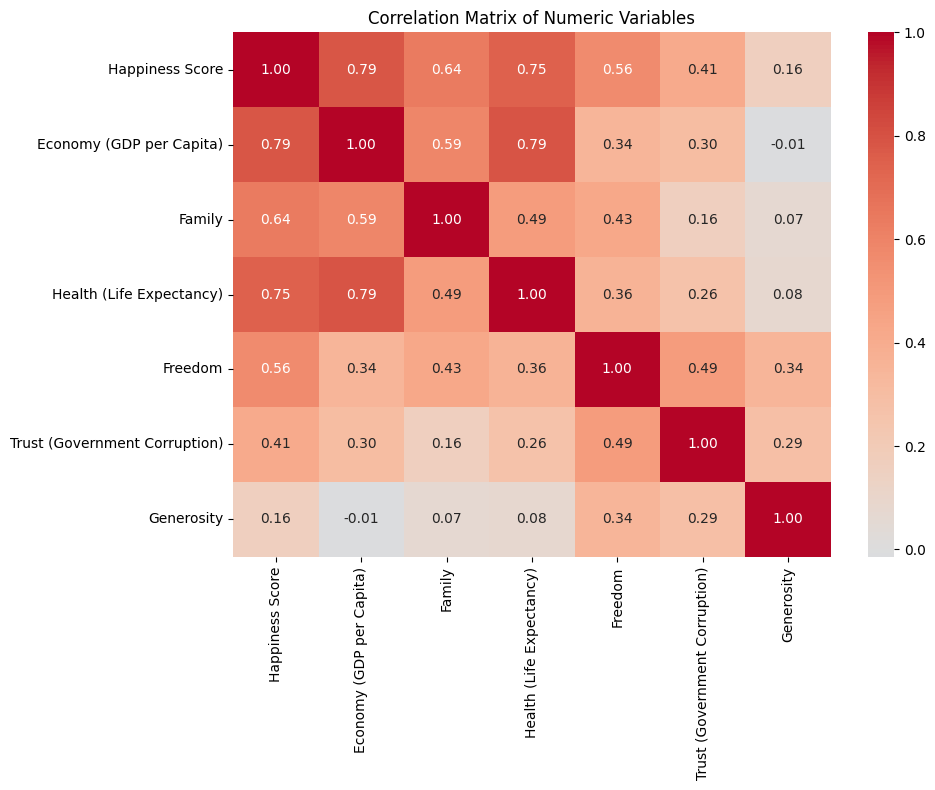

In [ ]:
correlation_matrix = happiness_df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

### Đề xuất pp cho từng cột

In [ ]:
recommendations = {
   'Region': {
       'Loại biến': 'Categorical',
       'Tỷ lệ missing': f"{categorical_analysis['Region']['Tỷ lệ missing (%)']:.2f}%",
       'Phương pháp đề xuất': 'Mode Imputation + Expert Knowledge',
       'Lý do': 'Biến categorical, ít thay đổi theo thời gian',
       'Cách thực hiện': 'df["Region"].fillna(df.groupby("Country")["Region"].transform("mode"))'
   },

   'Happiness Score': {
       'Loại biến': 'Numeric',
       'Tỷ lệ missing': f"{numeric_analysis['Happiness Score']['Tỷ lệ missing (%)']:.2f}%",
       'Phương pháp đề xuất': 'Model-based Imputation',
       'Lý do': 'Biến mục tiêu, có tương quan cao với nhiều biến khác',
       'Cách thực hiện': 'IterativeImputer()'
   },

   'Economy (GDP per Capita)': {
       'Loại biến': 'Numeric',
       'Tỷ lệ missing': f"{numeric_analysis['Economy (GDP per Capita)']['Tỷ lệ missing (%)']:.2f}%",
       'Phương pháp đề xuất': 'Time-based + Regional Mean',
       'Lý do': 'Có xu hướng theo thời gian và tương đồng trong khu vực',
       'Cách thực hiện': 'Linear interpolation + Regional adjustment'
   },

   'Family': {
       'Loại biến': 'Numeric',
       'Tỷ lệ missing': f"{numeric_analysis['Family']['Tỷ lệ missing (%)']:.2f}%",
       'Phương pháp đề xuất': 'Group-based Imputation',
       'Lý do': 'Có tương quan mạnh với yếu tố văn hóa và khu vực',
       'Cách thực hiện': 'df.groupby("Region")["Family"].transform("mean")'
   },

   'Health (Life Expectancy)': {
       'Loại biến': 'Numeric',
       'Tỷ lệ missing': f"{numeric_analysis['Health (Life Expectancy)']['Tỷ lệ missing (%)']:.2f}%",
       'Phương pháp đề xuất': 'Time-based + GDP-based',
       'Lý do': 'Thay đổi chậm theo thời gian và có tương quan với GDP',
       'Cách thực hiện': 'Kết hợp linear interpolation và regression với GDP'
   },

   'Freedom': {
       'Loại biến': 'Numeric',
       'Tỷ lệ missing': f"{numeric_analysis['Freedom']['Tỷ lệ missing (%)']:.2f}%",
       'Phương pháp đề xuất': 'Group-based + Model-based',
       'Lý do': 'Có tương quan với khu vực và các chỉ số xã hội khác',
       'Cách thực hiện': 'KNNImputer(n_neighbors=5) với group features'
   },

   'Trust (Government Corruption)': {
       'Loại biến': 'Numeric',
       'Tỷ lệ missing': f"{numeric_analysis['Trust (Government Corruption)']['Tỷ lệ missing (%)']:.2f}%",
       'Phương pháp đề xuất': 'Model-based Imputation',
       'Lý do': 'Có mối quan hệ phức tạp với nhiều biến khác',
       'Cách thực hiện': 'IterativeImputer() với feature engineering'
   },

   'Generosity': {
       'Loại biến': 'Numeric',
       'Tỷ lệ missing': f"{numeric_analysis['Generosity']['Tỷ lệ missing (%)']:.2f}%",
       'Phương pháp đề xuất': 'KNN Imputation',
       'Lý do': 'Phụ thuộc vào đặc điểm văn hóa-xã hội tương đồng',
       'Cách thực hiện': 'KNNImputer(n_neighbors=5)'
   },

   'Country': {
       'Loại biến': 'Categorical',
       'Tỷ lệ missing': f"{categorical_analysis['Country']['Tỷ lệ missing (%)']:.2f}%",
       'Phương pháp đề xuất': 'Không điền giá trị thiếu',
       'Lý do': 'Là identifier chính, không nên điền giá trị thiếu',
       'Cách thực hiện': 'Loại bỏ record nếu thiếu Country'
   }
}

print("\nĐề xuất phương pháp xử lý cho từng cột:")
print(tabulate(pd.DataFrame(recommendations).T,
             headers='keys',
             tablefmt='fancy_grid'))


Đề xuất phương pháp xử lý cho từng cột:
╒═══════════════════════════════╤═════════════╤═════════════════╤════════════════════════════════════╤════════════════════════════════════════════════════════╤════════════════════════════════════════════════════════════════════════╕
│                               │ Loại biến   │ Tỷ lệ missing   │ Phương pháp đề xuất                │ Lý do                                                  │ Cách thực hiện                                                         │
╞═══════════════════════════════╪═════════════╪═════════════════╪════════════════════════════════════╪════════════════════════════════════════════════════════╪════════════════════════════════════════════════════════════════════════╡
│ Region                        │ Categorical │ 3.86%           │ Mode Imputation + Expert Knowledge │ Biến categorical, ít thay đổi theo thời gian           │ df["Region"].fillna(df.groupby("Country")["Region"].transform("mode")) │
├──────────────────────────

## Imputation và đánh giá

### Imputation

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 1. Tạo một bản sao của dữ liệu gốc để so sánh
happiness_df_original = happiness_df.copy()

# 2. Thực hiện imputation cho từng cột
def impute_data(df):
   df_imputed = df.copy()

   # Region: Mode Imputation by Country
   df_imputed['Region'] = df_imputed['Region'].fillna(
       df_imputed.groupby('Country')['Region'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
   )

   # Economy (GDP per Capita): Time-based + Regional Mean
   for country in df_imputed['Country'].unique():
       country_data = df_imputed[df_imputed['Country'] == country]
       if country_data['Economy (GDP per Capita)'].isnull().any():
           # First try time-based interpolation
           df_imputed.loc[df_imputed['Country'] == country, 'Economy (GDP per Capita)'] = \
               country_data['Economy (GDP per Capita)'].interpolate(method='linear')

   # Fill remaining with regional mean
   df_imputed['Economy (GDP per Capita)'] = df_imputed.groupby('Region')['Economy (GDP per Capita)'].transform(
       lambda x: x.fillna(x.mean())
   )

   # Family and Freedom: Group-based
   for col in ['Family', 'Freedom']:
       df_imputed[col] = df_imputed.groupby('Region')[col].transform(
           lambda x: x.fillna(x.mean())
       )

   # Health: Time-based + GDP-based
   for country in df_imputed['Country'].unique():
       country_data = df_imputed[df_imputed['Country'] == country]
       if country_data['Health (Life Expectancy)'].isnull().any():
           df_imputed.loc[df_imputed['Country'] == country, 'Health (Life Expectancy)'] = \
               country_data['Health (Life Expectancy)'].interpolate(method='linear')

   # Trust and Generosity: Model-based
   numeric_cols = ['Happiness Score', 'Economy (GDP per Capita)', 'Family',
                  'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']

   imp_iterative = IterativeImputer(max_iter=10, random_state=42)
   df_imputed[numeric_cols] = imp_iterative.fit_transform(df_imputed[numeric_cols])

   return df_imputed

# Thực hiện imputation
happiness_df_imputed = impute_data(happiness_df)

### Đánh giá kết quả

In [ ]:
# 3. Đánh giá kết quả
def evaluate_imputation(original_df, imputed_df):
   evaluation = {}

   # So sánh thống kê mô tả
   for col in original_df.select_dtypes(include=[np.number]).columns:
       orig_stats = original_df[col].describe()
       imp_stats = imputed_df[col].describe()

       evaluation[col] = {
           'Original Mean': orig_stats['mean'],
           'Imputed Mean': imp_stats['mean'],
           'Mean Diff (%)': ((imp_stats['mean'] - orig_stats['mean'])/orig_stats['mean']*100).round(2),
           'Original Std': orig_stats['std'],
           'Imputed Std': imp_stats['std'],
           'Std Diff (%)': ((imp_stats['std'] - orig_stats['std'])/orig_stats['std']*100).round(2)
       }

   return pd.DataFrame(evaluation).T

# Đánh giá tổng thể
evaluation_results = evaluate_imputation(
   happiness_df_original,
   happiness_df_imputed
)

print("\nĐánh giá kết quả imputation:")
print(tabulate(evaluation_results, headers='keys', tablefmt='fancy_grid', floatfmt='.3f'))


Đánh giá kết quả imputation:
╒═══════════════════════════════╤═════════════════╤════════════════╤═════════════════╤════════════════╤═══════════════╤════════════════╕
│                               │   Original Mean │   Imputed Mean │   Mean Diff (%) │   Original Std │   Imputed Std │   Std Diff (%) │
╞═══════════════════════════════╪═════════════════╪════════════════╪═════════════════╪════════════════╪═══════════════╪════════════════╡
│ Happiness Score               │           5.371 │          5.339 │          -0.600 │          1.137 │         1.133 │         -0.350 │
├───────────────────────────────┼─────────────────┼────────────────┼─────────────────┼────────────────┼───────────────┼────────────────┤
│ Economy (GDP per Capita)      │           0.928 │          0.914 │          -1.530 │          0.416 │         0.420 │          1.080 │
├───────────────────────────────┼─────────────────┼────────────────┼─────────────────┼────────────────┼───────────────┼────────────────┤
│ Family   

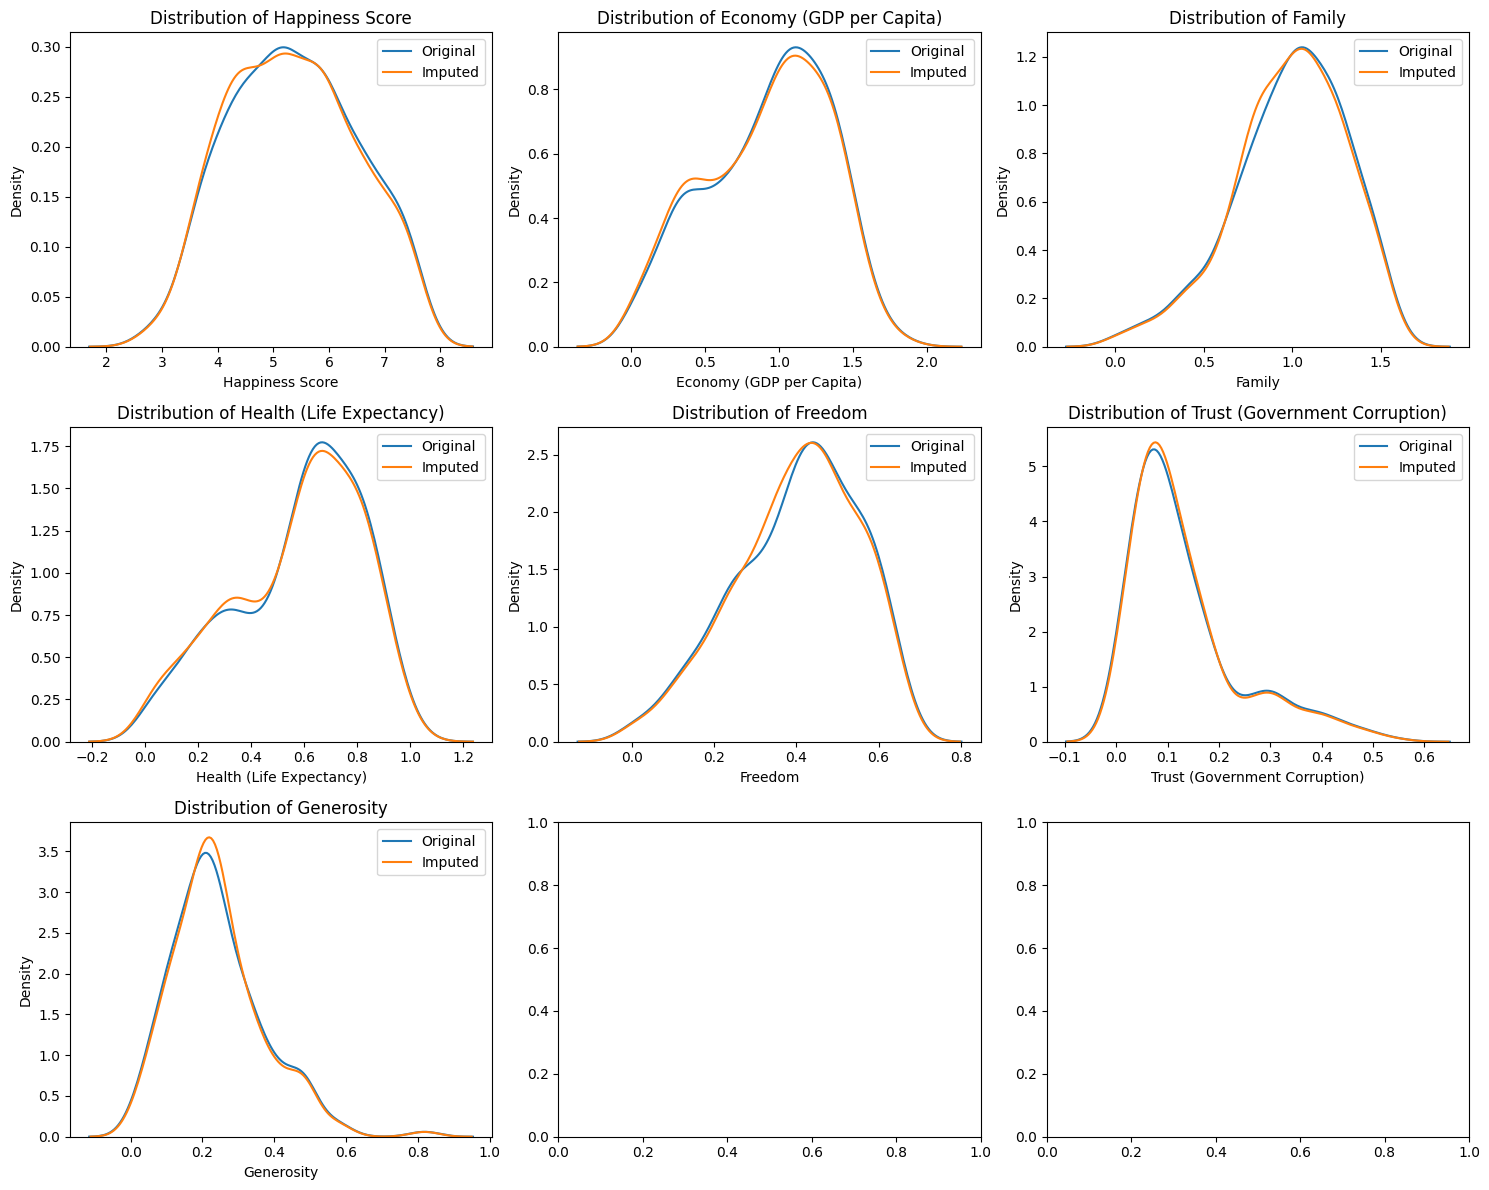

In [ ]:
# 4. Kiểm tra phân phối trước và sau imputation
def plot_distributions(original_df, imputed_df, columns, n_rows=3):
    n_cols = (len(columns) + n_rows - 1) // n_rows  # Tính số cột cần thiết
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))  # Tạo lưới subplot
    axes = axes.ravel()  # Làm phẳng mảng 2D thành 1D cho dễ truy cập

    for idx, col in enumerate(columns):
        # Original distribution
        sns.kdeplot(data=original_df[col].dropna(), ax=axes[idx], label='Original')
        # Imputed distribution
        sns.kdeplot(data=imputed_df[col], ax=axes[idx], label='Imputed')

        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].legend()

    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ so sánh phân phối
numeric_cols = ['Happiness Score', 'Economy (GDP per Capita)', 'Family',
              'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
              'Generosity']

plot_distributions(happiness_df_original, happiness_df_imputed, numeric_cols)

In [ ]:
# 5. Kiểm tra tương quan sau imputation
def compare_correlations(original_df, imputed_df):
   # Tính ma trận tương quan
   corr_orig = original_df.corr()
   corr_imp = imputed_df.corr()

   # Tính độ chênh lệch
   corr_diff = (corr_imp - corr_orig).abs()

   return corr_diff

correlation_difference = compare_correlations(
   happiness_df_original.select_dtypes(include=[np.number]),
   happiness_df_imputed.select_dtypes(include=[np.number])
)

print("\nĐộ chênh lệch trong ma trận tương quan:")
print(tabulate(correlation_difference, headers='keys', tablefmt='fancy_grid', floatfmt='.3f'))


Độ chênh lệch trong ma trận tương quan:
╒═══════════════════════════════╤═══════════════════╤════════════════════════════╤══════════╤════════════════════════════╤═══════════╤═════════════════════════════════╤══════════════╤════════╕
│                               │   Happiness Score │   Economy (GDP per Capita) │   Family │   Health (Life Expectancy) │   Freedom │   Trust (Government Corruption) │   Generosity │   Year │
╞═══════════════════════════════╪═══════════════════╪════════════════════════════╪══════════╪════════════════════════════╪═══════════╪═════════════════════════════════╪══════════════╪════════╡
│ Happiness Score               │             0.000 │                      0.007 │    0.005 │                      0.008 │     0.001 │                           0.005 │        0.004 │  0.002 │
├───────────────────────────────┼───────────────────┼────────────────────────────┼──────────┼────────────────────────────┼───────────┼─────────────────────────────────┼──────────────┼────